 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [42]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [43]:
# Reading whale returns
whale_returns = pd.read_csv('whale_returns.csv', index_col ='Date', parse_dates=True, infer_datetime_format=True)
whale_returns = whale_returns.sort_index()

In [44]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [45]:
# Drop nulls
whale_returns = whale_returns.dropna()

In [46]:
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [47]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv', index_col ='Date', parse_dates=True, infer_datetime_format=True)
algo_returns = algo_returns.sort_index()

In [48]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [49]:
# Drop nulls
algo_returns = algo_returns.dropna()

In [50]:
algo_returns.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [51]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv('sp500_history.csv', index_col ='Date', parse_dates=True, infer_datetime_format=True)
sp500_history = sp500_history.sort_index()

In [52]:
sp500_history.isna().sum()

Close    0
dtype: int64

In [53]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [54]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace("$",' ')

<ipython-input-54-4aeae4ce40a7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace("$",' ')


In [55]:
sp500_history['Close']

Date
2012-10-01     1444.49
2012-10-02     1445.75
2012-10-03     1450.99
2012-10-04     1461.40
2012-10-05     1460.93
                ...   
2019-04-16     2907.06
2019-04-17     2900.45
2019-04-18     2905.03
2019-04-22     2907.97
2019-04-23     2933.68
Name: Close, Length: 1649, dtype: object

In [56]:
sp500_history = sp500_history.astype(float)

In [57]:
sp500_history.dtypes

Close    float64
dtype: object

In [58]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.columns = ['sp500_close']

In [59]:
# Calculate Daily Returns
sp500_history['sp_500_returns'] = sp500_history['sp500_close'].pct_change()

In [60]:
# Drop nulls
sp500_history = sp500_history.dropna()
sp500_history.isna().sum()

sp500_close       0
sp_500_returns    0
dtype: int64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [61]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

whale_combined = pd.concat([whale_returns, sp500_history, algo_returns], axis=1, join='inner')
#whale_combined = whale_combined.drop('sp500_close', axis=1)
whale_combined.columns = ['soros', 'paulson', 'tiger', 'berkshire','sp500_close', 'sp500_returns', 'Algo_1', 'Algo_2']

In [62]:
whale_combined_returns = whale_combined.drop('sp500_close', axis=1)

In [63]:
whale_combined_returns = whale_combined_returns.sort_index()
whale_combined_returns

,soros,paulson,tiger,berkshire,sp500_returns,Algo_1,Algo_2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

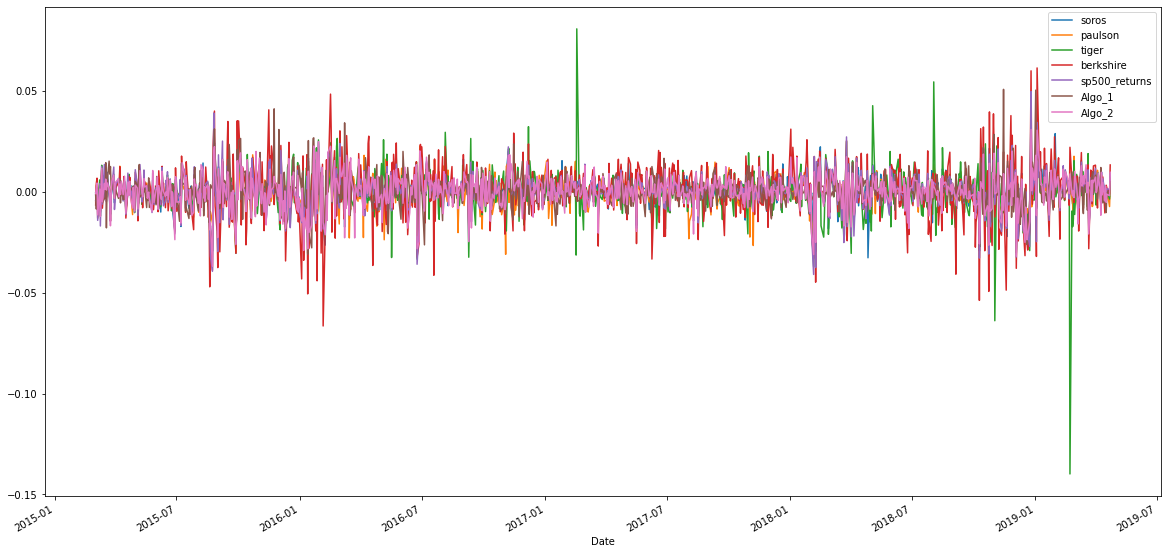

In [64]:
# Plot daily returns of all portfolios
whale_combined_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

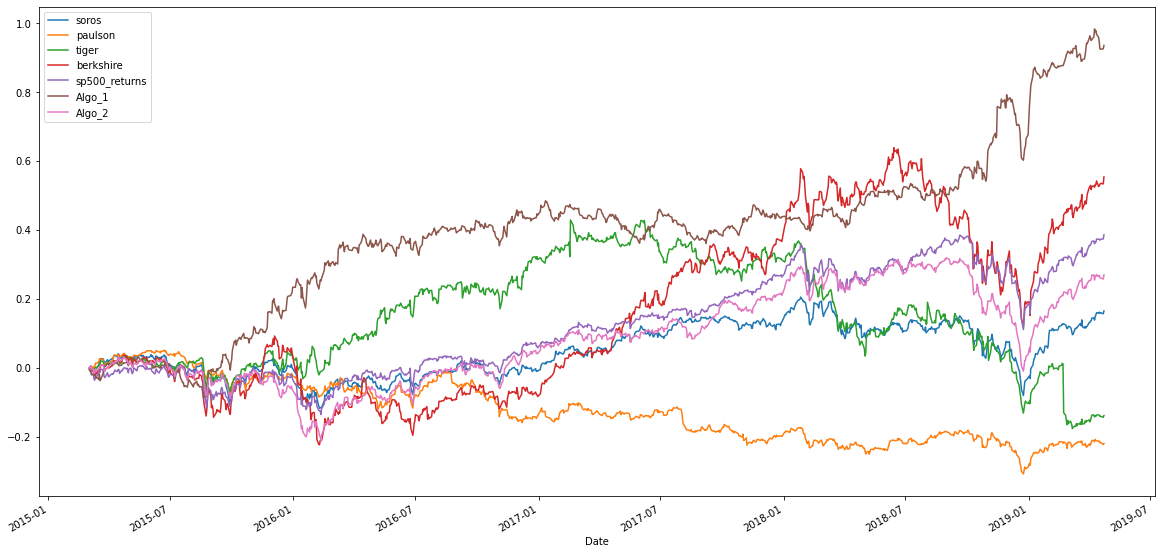

In [65]:
# Calculate cumulative returns of all portfolios
whale_cumulative_returns = (1+whale_combined_returns).cumprod() -1
# Plot cumulative returns
whale_cumulative_returns.plot(figsize=(20,10))
#whale_cumulative_returns

## Does any portfolio outperform the S&P 500?

Berkshire and Algo 1 outperform the S&P

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


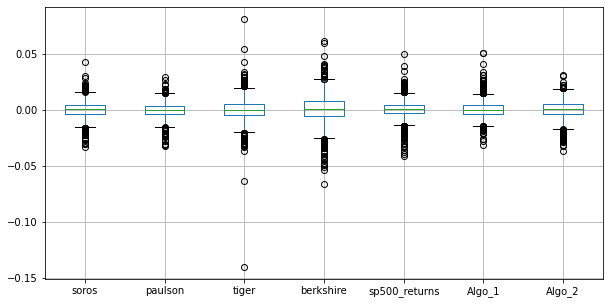

In [66]:
# Box plot to visually show risk
boxplot = whale_combined_returns.boxplot(['soros', 'paulson', 'tiger', 'berkshire', 'sp500_returns', 'Algo_1', 'Algo_2'], figsize=(10,5))

### Calculate Standard Deviations

In [67]:
# Calculate the daily standard deviations of all portfolios
standard_dev_all = whale_combined_returns.std()
standard_dev_all

soros            0.007895
paulson          0.007023
tiger            0.010894
berkshire        0.012919
sp500_returns    0.008554
Algo_1           0.007620
Algo_2           0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [68]:
# Calculate  the daily standard deviation of S&P 500
standard_dev_all.sort_values(ascending=False)
# Determine which portfolios are riskier than the S&P 500


berkshire        0.012919
tiger            0.010894
sp500_returns    0.008554
Algo_2           0.008342
soros            0.007895
Algo_1           0.007620
paulson          0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [69]:
# Calculate the annualized standard deviation (252 trading days)
standard_dev_annualized = whale_combined_returns.std() * np.sqrt(252)
standard_dev_annualized.sort_values(ascending=False)

berkshire        0.205077
tiger            0.172936
sp500_returns    0.135786
Algo_2           0.132430
soros            0.125335
Algo_1           0.120967
paulson          0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

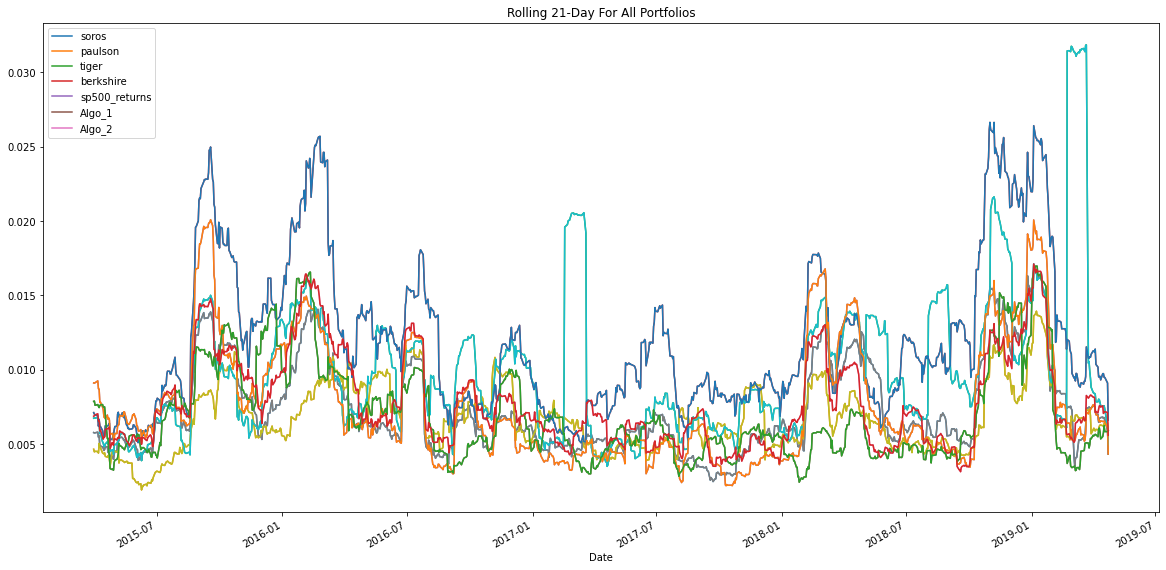

In [70]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = whale_combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
ax = rolling_std.plot(figsize=(20,10), title='Rolling 21-Day For All Portfolios')
rolling_std.plot(ax=ax)
ax.legend(['soros', 'paulson', 'tiger', 'berkshire', 'sp500_returns', 'Algo_1', 'Algo_2'])

### Calculate and plot the correlation

In [71]:
# Calculate the correlation
whale_correlation = whale_combined_returns.corr()
# Display de correlation matrix
whale_correlation

,soros,paulson,tiger,berkshire,sp500_returns,Algo_1,Algo_2
soros,1.000000,0.699914,0.561243,0.754360,0.837864,0.321211,0.826873
paulson,0.699914,1.000000,0.434479,0.545623,0.669732,0.268840,0.678152
tiger,0.561243,0.434479,1.000000,0.424423,0.623946,0.164387,0.507414
berkshire,0.754360,0.545623,0.424423,1.000000,0.751371,0.292033,0.688082
sp500_returns,0.837864,0.669732,0.623946,0.751371,1.000000,0.279494,0.858764
Algo_1,0.321211,0.268840,0.164387,0.292033,0.279494,1.000000,0.288243
Algo_2,0.826873,0.678152,0.507414,0.688082,0.858764,0.288243,1.000000


<AxesSubplot:>

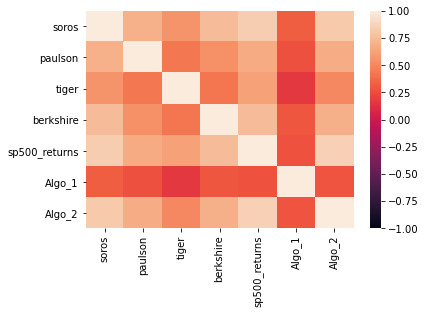

In [72]:
sns.heatmap(whale_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

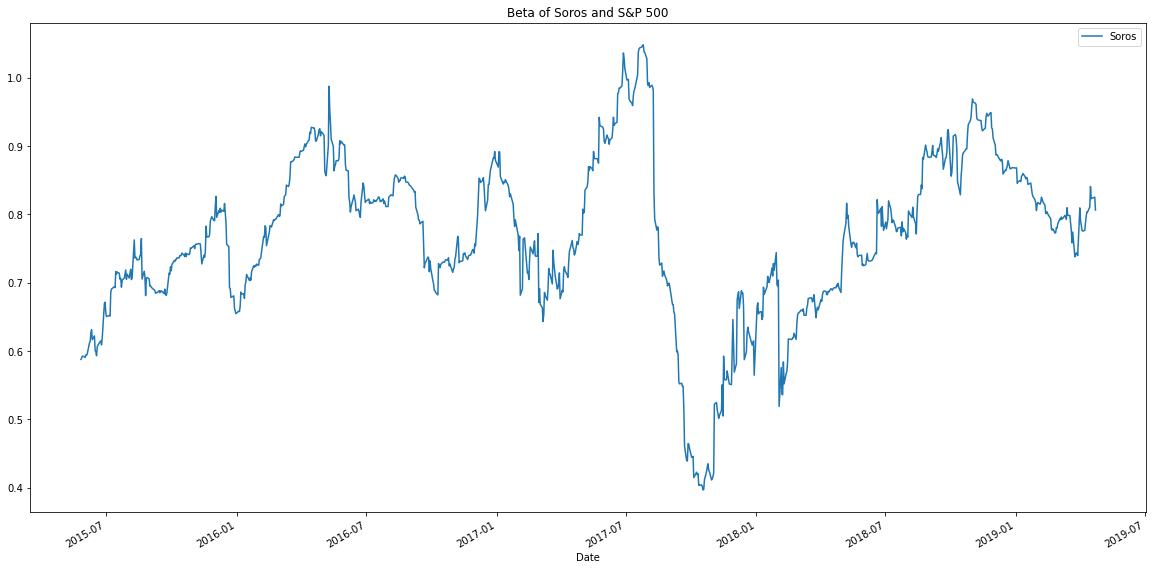

In [73]:
# Calculate covariance of a single portfolio  !!!!!!!
cov_soros= whale_combined_returns['soros'].cov(whale_combined_returns['sp500_returns'])
#print(f'The covariance of the Soros portfolio to the sp500 is {cov_soros}')
# Calculate variance of S&P 500
var_sp500 = whale_combined_returns['sp500_returns'].var()
# Computing beta
beta_whale_returns = cov_soros/var_sp500

# Plot beta trend
rolling_soros_cov = whale_combined_returns['soros'].rolling(window=60).cov(whale_combined_returns['sp500_returns'])
rolling_sp500_var = whale_combined_returns['sp500_returns'].rolling(window=60).var()
rolling_beta_soros_sp500 = rolling_soros_cov/rolling_sp500_var
      
ax = rolling_beta_soros_sp500.plot(figsize=(20,10), title='Beta of Soros and S&P 500')
#rolling_beta_soros_sp500.plot(ax=ax)
ax.legend(['Soros'])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [74]:
# Use `ewm` to calculate the rolling window
whale_combined_ewm = whale_combined_returns.ewm(halflife=21).mean()
whale_combined_ewm


,soros,paulson,tiger,berkshire,sp500_returns,Algo_1,Algo_2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.004462,-0.005320,0.000761
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.002514,-0.003817,0.001988
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.005575,-0.004116,-0.001542
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.003543,-0.004400,-0.000935
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.001352,0.000912,0.001364
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.001234,0.000548,0.001150
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.001246,0.000511,0.001073


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [75]:
# Annualized Sharpe Ratios
whale_combined_returns_sharpe = ((whale_combined_returns.mean()*252)/ (whale_combined_returns.std()*np.sqrt(252)))
whale_combined_returns_sharpe

soros            0.356417
paulson         -0.483570
tiger           -0.121060
berkshire        0.621810
sp500_returns    0.648267
Algo_1           1.378648
Algo_2           0.501364
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of All Portfolios'}>

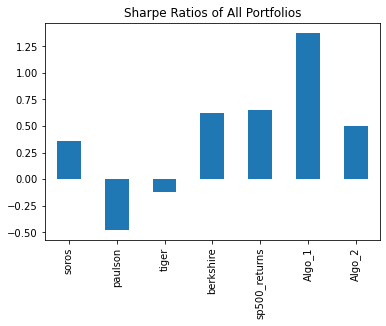

In [76]:
# Visualize the sharpe ratios as a bar plot
whale_combined_returns_sharpe.plot(kind='bar', title='Sharpe Ratios of All Portfolios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Only algo 1 outperformed all other portfolios and the market.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [77]:
# Reading data from 1st stock
goog = pd.read_csv('goog_historical.csv', index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
#index_col ='Date', parse_dates=True, infer_datetime_format=True)
goog.sort_index()
goog

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [78]:
# Reading data from 2nd stock
aapl = pd.read_csv('aapl_historical.csv', index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl.sort_index()
aapl

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [79]:
# Reading data from 3rd stock
cost = pd.read_csv('cost_historical.csv', index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost.sort_index()
cost

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [80]:
# Combine all stocks in a single DataFrame
portfolio = pd.concat([goog,aapl,cost], axis=0, join='inner')
portfolio

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [81]:
# Reset Date index
portfolio=portfolio.reset_index()
portfolio.head()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [82]:
# Reorganize portfolio data by having a column per symbol
portfolio = portfolio.pivot_table(values='NOCP', index="Trade DATE", columns="Symbol")
portfolio.sort_index()
portfolio

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [83]:
# Calculate daily returns
all_returns = portfolio.pct_change()
# Drop NAs
all_returns = all_returns.dropna()
# Display sample data
all_returns.isna().sum()
all_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [84]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = all_returns.dot(weights)
# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [85]:
# Join your returns DataFrame to the original returns DataFrame
whale_combined_returns['my_portfolio'] = portfolio_returns
whale_combined_returns.sort_index()
whale_combined_returns

,soros,paulson,tiger,berkshire,sp500_returns,Algo_1,Algo_2,my_portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229,0.001545


In [86]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
whale_combined_returns = whale_combined_returns.dropna()
whale_combined_returns.isna().sum()
whale_combined_returns

,soros,paulson,tiger,berkshire,sp500_returns,Algo_1,Algo_2,my_portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000884,0.000915,0.001635,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842,-0.001135,-0.001139,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.004061,-0.002326,0.003341,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.000856,-0.006949,0.005205,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632,0.002557,-0.002496,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229,0.001545


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [87]:
# Calculate the annualized `std`

annualized_std_myp = whale_combined_returns.std() * np.sqrt(252)
annualized_std_myp.sort_values(ascending=False)

berkshire        0.247155
tiger            0.232531
my_portfolio     0.211496
sp500_returns    0.152054
soros            0.146675
Algo_2           0.139556
Algo_1           0.133704
paulson          0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

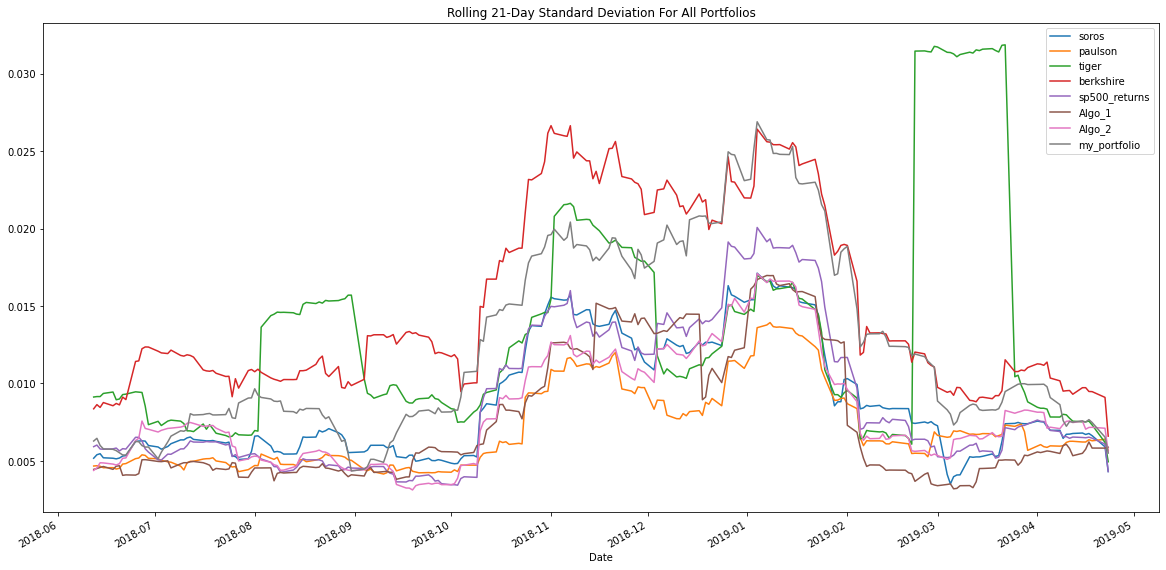

In [88]:
# Calculate rolling standard deviation
myp_rolling_std = whale_combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
ax =myp_rolling_std.plot(figsize=(20,10), title='Rolling 21-Day Standard Deviation For All Portfolios')
ax.legend(['soros', 'paulson', 'tiger', 'berkshire', 'sp500_returns', 'Algo_1', 'Algo_2','my_portfolio'])
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

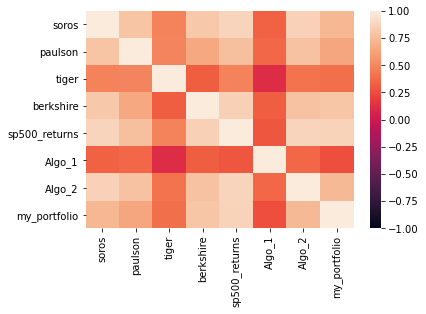

In [89]:
# Calculate and plot the correlation
correlation = whale_combined_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

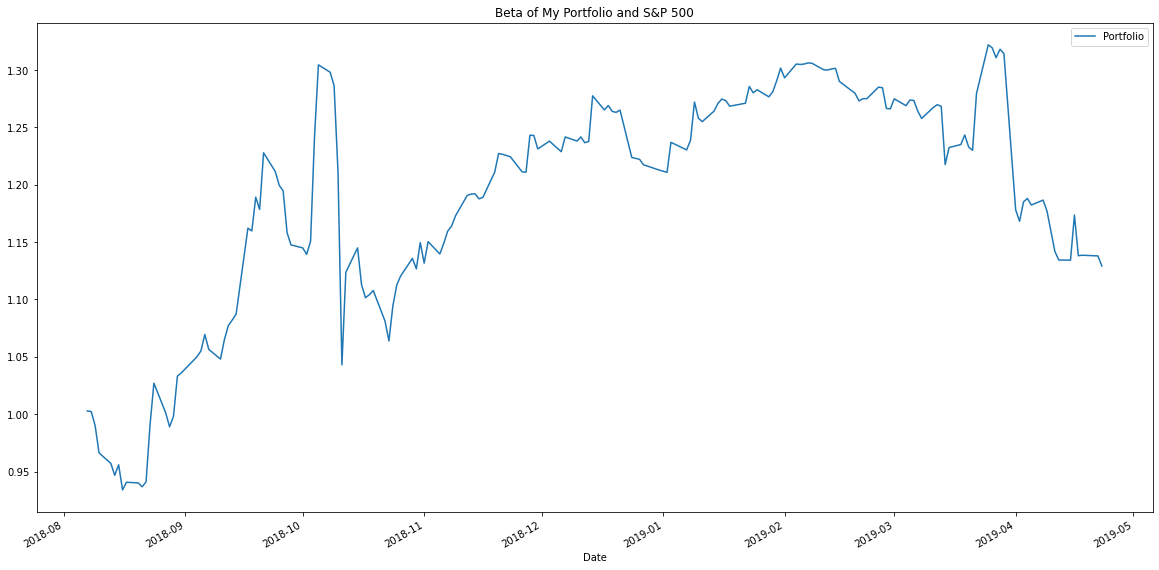

In [90]:
# Calculate and plot Beta
portfolio_cov = whale_combined_returns['my_portfolio'].cov(whale_combined_returns['sp500_returns'])

rolling_portfolio_cov = whale_combined_returns['my_portfolio'].rolling(window=60).cov(whale_combined_returns['sp500_returns'])

beta_portfolio = portfolio_cov/var_sp500

rolling_beta_mp = rolling_portfolio_cov/rolling_sp500_var
# Plot beta trend      
    
ax = rolling_beta_mp.plot(figsize=(20,10), title='Beta of My Portfolio and S&P 500')
ax.legend(['Portfolio'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [91]:
# Calculate Annualzied Sharpe Ratios

portfolio_sharpe = ((whale_combined_returns.mean()*252)/ (whale_combined_returns.std()*np.sqrt(252)))
portfolio_sharpe

soros            0.430713
paulson          0.258738
tiger           -1.034216
berkshire        0.159756
sp500_returns    0.584820
Algo_1           2.035665
Algo_2           0.080607
my_portfolio     0.933123
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

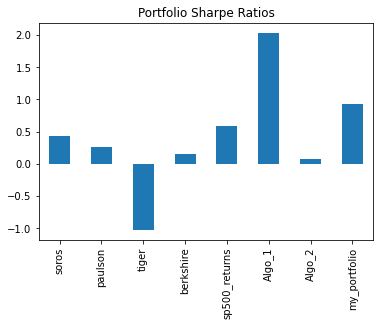

In [92]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe.plot(kind='bar', title='Portfolio Sharpe Ratios')

### How does your portfolio do?

My portfolio did better than all other portfolios on a risk adjusted basis except for Algo 1.

In [93]:
print('Whale Portfolios and Algorithmic Strategies Performance')
print("-"*100)
print(f'Berkshire and Algo 1 outperform the S&P.')
print('')
print(f'''The Berkshire and Tiger portfolios are both riskier than the S&P 500 index.
    S&P 500 standard deviation| {round(standard_dev_all['sp500_returns'], 4)}
    Berkshire Hathaway standard deviation| {round(standard_dev_all['berkshire'], 4)}
    Tiger Global Management standard deviation| {round(standard_dev_all['tiger'], 4)}''')
print('')
print(f'''The annualized standard deviations of all portfolios:
   S&P 500| {round(standard_dev_annualized['sp500_returns'], 4)}
   Soros Fund Management| {round(standard_dev_annualized['soros'], 4)}, 
   Paulson & Co| {round(standard_dev_annualized['paulson'], 4)}
   Tiger Gloabal Management| {round(standard_dev_annualized['tiger'], 4)}
   Berkshire Hathaway| {round(standard_dev_annualized['berkshire'], 4)}
   Algo 1| {round(standard_dev_annualized['Algo_1'], 4)}
   Algo 2| {round(standard_dev_annualized['Algo_2'], 4)}''')
print('')
print('''In general the portfolios did not mimic the sp500. This is a good thing, because during the given time frame, 
the sp500 index had a negative cummulative return. Therefore, while the market went down, 
these portfolios increased in value. This means that the other portfolios had a stong negative correlation with the S&P 500. ''')
print('')
print(f'The Beta of the Soros portfolio is {beta_whale_returns}')
print('')
print(f'''Only Algo 1 outperformed all other portfolios and the S&P 500
    The Sharpe Ratios of All Portfolios: 
    S&P 500| {round(whale_combined_returns_sharpe['sp500_returns'], 4)}
    Soros Fund Management| {round(whale_combined_returns_sharpe['soros'], 4)}
    Paulson & Co| {round(whale_combined_returns_sharpe['paulson'], 4)}
    Tiger Global Management| {round(whale_combined_returns_sharpe['tiger'], 4)}
    Berkshire Hathaway| {round(whale_combined_returns_sharpe['berkshire'], 4)}
    Algo 1| {round(whale_combined_returns_sharpe['Algo_1'], 4)}
    Algo 2| {round(whale_combined_returns_sharpe['Algo_2'], 4)}
''')
print('')
print('''The algorithmic studies both outperformed the S&P 500 index. Their Sharpe Ratios were highly positive, which means they had greater returns with less risk. 
They did not, however, outperform all of the portfolios. The Berkshire Hathaway portfolio had a greater Sharpe 
Ratio than Algorithmic Strategy 2. Overall, we can say that Algorithmic Strategy 1 had the greatest risk adjusted
returns.''')
print('')
print('My Portfolio Performance Compared to the Whale Portfolios and Algorithmic Strategies')
print('-'*100)
print(f'''The annualized standard deviations of all portfolios including my portfolio:
    S&P 500| {round(annualized_std_myp['sp500_returns'], 4)}
    My Portfolio| {round(annualized_std_myp['my_portfolio'], 4)}
    Soros Fund Management| {round(annualized_std_myp['soros'], 4)}
    Paulson & Co| {round(annualized_std_myp['paulson'], 4)}
    Tiger Global Management| {round(annualized_std_myp['tiger'], 4)}
    Berkshire Hathaway| {round(annualized_std_myp['berkshire'], 4)}
    Algo 1| {round(annualized_std_myp['Algo_1'], 4)}
    Algo 2| {round(annualized_std_myp['Algo_2'], 4)}''')
print('')
print('''In this set there is a strong positive correlation to the S&P 500 for most of the portfolios except Algo 1. 
This is most likely due to the decreased time frame of the dataset. Only a portion of the initial data set 
for the whales is included to compare to my portfolio.''')
print('')
print(f'Beta of the My Portfolio : {beta_portfolio}')
print('')
print(f'''The Sharpe Ratios of all the portfolios including My Portfolio:
    S&P 500| {round(portfolio_sharpe['sp500_returns'], 4)}
    My Portfolio| {round(portfolio_sharpe['my_portfolio'], 4)}
    Soros Fund Management| {round(portfolio_sharpe['soros'], 4)}
    Paulson & Co| {round(portfolio_sharpe['paulson'], 4)}
    Tiger Global Management| {round(portfolio_sharpe['tiger'], 4)}
    Berkshire Hathaway| {round(portfolio_sharpe['berkshire'], 4)}
    Algo 1| {round(portfolio_sharpe['Algo_1'], 4)}
    Algo 2| {round(portfolio_sharpe['Algo_2'], 4)}''')
print('')
print(f"""My portfolio performed well compared to the other portfolios. This can be seen first in the comparison of the beta
from the Soros Fund Management portfolio and My portfolio. The beta in my portfolio is signficantly greater than the Soros 
beta, which means that when the market as a whole goes up, or enters a bull phase, my portfolio benefits from the volatility
to the upside. This is subjective of whether or not the holder of the portfolio can stomach the risk of volatility
swings to the upside. Generally speaking it could be wonderful to benefit from the upside potental of the market,
but a well diversified portfolio doesn't necessarily want to correlate with the market all the time, especially
when the market goes down. We can also see that the annualized standard deviation of my portfolio was among the 
highest, and it was greater than the S&P 500, indicating that holding my portfolio could be riskier than just holding the index.
The sharpe ratio for my portfolio was {round(portfolio_sharpe['my_portfolio'], 4)}, which is good. A higher Sharpe Ratio
indicates greater risk adjusted returns. The Sharpe Ratio of my portfolio overall was second highest, being beat only 
by Algo 1. For the period of time encompassed by thid data frame, I would say this portfolio performed well, especially
on a risk adjusted basis.
""")

Whale Portfolios and Algorithmic Strategies Performance
----------------------------------------------------------------------------------------------------
Berkshire and Algo 1 outperform the S&P.

The Berkshire and Tiger portfolios are both riskier than the S&P 500 index.
    S&P 500 standard deviation| 0.0086
    Berkshire Hathaway standard deviation| 0.0129
    Tiger Global Management standard deviation| 0.0109

The annualized standard deviations of all portfolios:
   S&P 500| 0.1358
   Soros Fund Management| 0.1253, 
   Paulson & Co| 0.1115
   Tiger Gloabal Management| 0.1729
   Berkshire Hathaway| 0.2051
   Algo 1| 0.121
   Algo 2| 0.1324

In general the portfolios did not mimic the sp500. This is a good thing, because during the given time frame, 
the sp500 index had a negative cummulative return. Therefore, while the market went down, 
these portfolios increased in value. This means that the other portfolios had a stong negative correlation with the S&P 500. 

The Beta of the S